In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

In [13]:
import dataset
X, Y = dataset.load_data()

In [14]:
pokemon_labels = np.array([
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy"])

In [24]:
y = Y[0]
#Type1しか取ってない
x_train = X[0:700]
y_train = y[0:700]
x_test = X[701:]
y_test = y[701:]

In [25]:
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=2525, verbose=0,
            warm_start=False)
clf.fit(x_train, y_train)
print(f"acc: {clf.score(x_test, y_test)}")

acc: 0.16


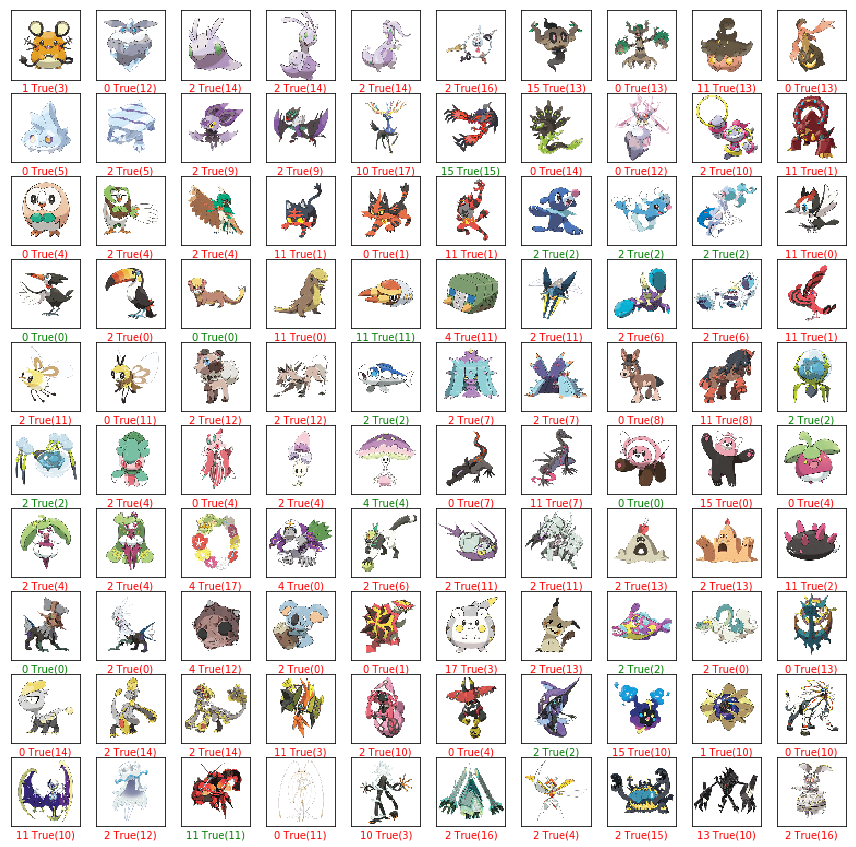

In [26]:
predicted_labels = clf.predict(x_test)

plt.figure(figsize=(15,15))
 
# 先頭から25枚テストデータを可視化
for i in range(100):
 
    # 画像を作成
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape((64,64,4)), cmap=plt.cm.binary)
 
    # 今プロットを作っている画像データの予測ラベルと正解ラベルをセット
    predicted_label = predicted_labels[i]
    true_label      = y_test[i]
 
    # 予測ラベルが正解なら緑、不正解なら赤色を使う
    if predicted_label == true_label:
        color = 'green' # True label color
    else:
        color = 'red'   # False label color
    plt.xlabel("{} True({})".format(predicted_label,
                                  true_label),
                                  color=color)